# Pre-Processing for GRASS GIS

Here, we will pre-process the files downloaded in steps 3 and 4. The primary objective is to re-project files before manipulating them with GRASS GIS in step 6.

<div class="alert alert-block alert-danger">
<b> Project Name Setting: </b> Please set the Project Name for your project </div>

In [1]:
# CHANGE PROJECT NAME HERE
PROJECT_NAME = 'Test'

# CURRENT DIRECTORY HERE, SET WHERE THE NOTEBOOKS ARE LOCATED
CURRENT_DIRECTORY = '/home/teaganbaiotto/Documents/bbgci'

# SET THE SPATIAL RESOLUTION (in meters)
SPATIAL_RESOLUTION = 30

In [2]:
import os, shutil
os.chdir(CURRENT_DIRECTORY)

In [3]:
# Define folder paths as global variables
PROJECT_DIR = os.path.join(CURRENT_DIRECTORY, PROJECT_NAME)
RAWGIS_DIR = os.path.join(PROJECT_DIR, "gis_data")
RAWOBS_DIR = os.path.join(PROJECT_DIR, "obs")
RAWSOIL_DIR = os.path.join(RAWGIS_DIR, "soil")
MODEL_DIR = os.path.join(PROJECT_DIR, 'model')
DEF_DIR = os.path.join(MODEL_DIR, 'defs')
INI_DIR = os.path.join(MODEL_DIR, 'ini_files')
EPC_DIR = os.path.join(MODEL_DIR, 'epc_files')
OUTPUT_DIR = os.path.join(MODEL_DIR, 'output')
CO2_DIR = os.path.join(MODEL_DIR, 'co2')
NDEP_DIR = os.path.join(MODEL_DIR, 'ndep')
ENDPOINT_DIR = os.path.join(MODEL_DIR, 'endpoint_files')
SPINUP_DIR = os.path.join(MODEL_DIR, 'spinup')
NORMAL_DIR = os.path.join(MODEL_DIR, 'normal')
MODEL_RAST_DIR = os.path.join(MODEL_DIR, 'raster_inputs')
IMAGE = os.path.join(PROJECT_DIR, 'image_map')

In [4]:
# Import necessary packages
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pyproj
from pyproj import CRS, Transformer, Proj, transform
import datetime as dt 
import xarray as xr
import rioxarray
import shapely
import rasterio
from rasterio.features import Affine
import time
from shapely.geometry import mapping
from netCDF4 import Dataset
import pandas as pd

In [5]:
# Define the daymet projection
daymet_proj = "+proj=lcc +ellps=WGS84 +a=6378137 +b=6356752.314245 +lat_1=25 +lat_2=60 +lon_0=-100 +lat_0=42.5 +x_0=0 +y_0=0 +units=m +no_defs"

In [6]:
# Open meteorological data downloaded in Step_1_C
opened = xr.open_dataset(os.path.join(MODEL_DIR, 'met_data', 'aoi_met.nc'))
display(opened)

<xarray.Dataset>
Dimensions:                  (x: 5, y: 5, time: 15330)
Coordinates:
  * x                        (x) float32 1.799e+06 1.8e+06 ... 1.803e+06
  * y                        (y) float32 -1.46e+05 -1.47e+05 ... -1.5e+05
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ... 20...
    lat                      (time, y, x) float32 ...
    lon                      (time, y, x) float32 ...
Data variables:
    lambert_conformal_conic  int16 ...
    prcp                     (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    dayl                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...

In [8]:
# Import GIS files
dem = xr.open_rasterio(os.path.join(RAWGIS_DIR, 'nasa_dem.tif'))
nlcd = xr.open_rasterio(os.path.join(RAWGIS_DIR, 'nlcd.tif'))

display(dem)
display(nlcd)

/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  
/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  This is separate from the ipykernel package so we can avoid doing imports until


<xarray.DataArray (band: 1, y: 116, x: 150)>
array([[[330, 329, ..., 419, 409],
        [330, 328, ..., 420, 412],
        ...,
        [218, 217, ..., 316, 312],
        [215, 214, ..., 317, 314]]], dtype=int16)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 38.87 38.87 38.87 38.87 ... 38.84 38.84 38.84 38.84
  * x        (x) float64 -78.08 -78.08 -78.08 -78.08 ... -78.04 -78.04 -78.04
Attributes:
    transform:               (0.00026949458523585647, 0.0, -78.07635426702092...
    crs:                     +init=epsg:4326
    res:                     (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

<xarray.DataArray (band: 1, y: 116, x: 150)>
array([[[41, 41, ..., 41, 41],
        [41, 41, ..., 41, 41],
        ...,
        [81, 81, ..., 41, 41],
        [81, 81, ..., 41, 41]]], dtype=uint8)
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 38.87 38.87 38.87 38.87 ... 38.84 38.84 38.84 38.84
  * x        (x) float64 -78.08 -78.08 -78.08 -78.08 ... -78.04 -78.04 -78.04
Attributes:
    transform:               (0.00026949458523585647, 0.0, -78.07635426702092...
    crs:                     +init=epsg:4326
    res:                     (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:                1
    nodatavals:              (0.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

##  Reproject GIS Files

We need to reproject the GIS files (DEM, land use, soils) downloaded from Geoserver to the same projection as the Daymet data. An easy way to do this is use **rioxarray's** reproject function.

In [9]:
# Reproject GIS files to Daymet projection

dem_reprojected = dem.rio.reproject(daymet_proj)
display(dem_reprojected)

nlcd_2 = nlcd.rio.write_nodata(0)
nlcd_reprojected = nlcd_2.rio.reproject(daymet_proj)
display(nlcd_reprojected)

<xarray.DataArray (band: 1, y: 164, x: 165)>
array([[[-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        ...,
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768],
        [-32768, -32768, -32768, ..., -32768, -32768, -32768]]],
      dtype=int16)
Coordinates:
  * x            (x) float64 1.799e+06 1.799e+06 ... 1.803e+06 1.803e+06
  * y            (y) float64 -1.465e+05 -1.465e+05 ... -1.505e+05 -1.505e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              -32768

<xarray.DataArray (band: 1, y: 164, x: 165)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * x            (x) float64 1.799e+06 1.799e+06 ... 1.803e+06 1.803e+06
  * y            (y) float64 -1.465e+05 -1.465e+05 ... -1.505e+05 -1.505e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    _FillValue:              0

In [10]:
# Save re-projected GIS files
dem_reprojected.rio.to_raster(os.path.join(RAWGIS_DIR, 'dem_reprojected.tif'))
nlcd_reprojected.rio.to_raster(os.path.join(RAWGIS_DIR, 'nlcd_reprojected.tif'))

##  Create Text Raster of Daymet Cell IDs

Generate an raster file corresponding to the appropriate Daymet cell to use. Uses an ID system which uniquely number each Daymet cell for easy parallelization later.

In [13]:
# Pre-processing for lat/lon file conversion
unique_both = []
count = 0
for i in range(len(opened['y'])):
    x_len = len(opened['x'])
    
    row_list = list(range(x_len*count, x_len*(count+1)))
    unique_both.append(row_list)
    
    count = count+1

opened = opened.assign(cell_num=(['y', 'x'], unique_both)).astype(float)
display(opened)

<xarray.Dataset>
Dimensions:                  (time: 15330, y: 5, x: 5)
Coordinates:
  * x                        (x) float32 1.799e+06 1.8e+06 ... 1.803e+06
  * y                        (y) float32 -1.46e+05 -1.47e+05 ... -1.5e+05
  * time                     (time) datetime64[ns] 1980-01-01T12:00:00 ... 20...
    lat                      (time, y, x) float32 ...
    lon                      (time, y, x) float32 ...
Data variables:
    lambert_conformal_conic  float64 -3.277e+04
    prcp                     (time, y, x) float64 0.0 0.0 0.0 ... 1.24 1.05 1.24
    tmax                     (time, y, x) float64 6.21 6.19 5.75 ... 15.83 15.71
    tmin                     (time, y, x) float64 -5.8 -5.77 -5.67 ... 7.91 7.82
    dayl                     (time, y, x) float64 3.359e+04 ... 3.358e+04
    srad                     (time, y, x) float64 249.9 273.7 ... 148.2 150.6
    vp                       (time, y, x) float64 396.3 397.2 ... 1.059e+03
    cell_num                 (y, x) float64 0.0 1.0 2.0 3.0 ... 22.0 23.0 24.0

In [18]:
# Display Daymet cell number GIS file
cell_num = opened['cell_num']
# cell_num = cell_num.reset_coords(names=['lat', 'lon'], drop=True)
cell_num = cell_num.rio.set_spatial_dims('x', 'y')
cell_num = cell_num.rio.set_crs(daymet_proj)
display(cell_num)

<xarray.DataArray 'cell_num' (y: 5, x: 5)>
array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])
Coordinates:
  * x        (x) float32 1.799e+06 1.8e+06 1.801e+06 1.802e+06 1.803e+06
  * y        (y) float32 -1.46e+05 -1.47e+05 -1.48e+05 -1.49e+05 -1.5e+05

In [19]:
# Create Daymet cell reference file from GIS file

x_coords = cell_num['x'].values
y_coords = cell_num['y'].values

cell_reference = []

row_num = 0
for row in cell_num.values:
    column_num = 0
    for column in row:
        df_row = [int(column), x_coords[column_num], y_coords[row_num]]
        cell_reference.append(df_row)
        column_num += 1
    row_num += 1
    
cell_df = pd.DataFrame(cell_reference)
cell_df.to_csv(os.path.join(DEF_DIR, 'met_cells.csv'), index=False, header=False)

In [20]:
# Display resampled daymet cell identifier
cell_num_final = cell_num.rio.reproject_match(dem_reprojected)
display(cell_num_final)

<xarray.DataArray 'cell_num' (y: 164, x: 165)>
array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.00000000e+000, 4.00000000e+000, 4.00000000e+000],
       [5.00000000e+000, 5.00000000e+000, 5.00000000e+000, ...,
        9.00000000e+000, 9.00000000e+000, 9.00000000e+000],
       [5.00000000e+000, 5.00000000e+000, 5.00000000e+000, ...,
        9.00000000e+000, 9.00000000e+000, 9.00000000e+000],
       ...,
       [2.00000000e+001, 2.00000000e+001, 2.00000000e+001, ...,
        2.40000000e+001, 2.40000000e+001, 2.40000000e+001],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308]])
Coordinates:
  * x            (x) float64 1.799e+06 1.799e+06 ... 1.803e+06 1.803e+06
  * y            (y) float64 -1.465e+05 -1.465e+05 ... -1.505e+05 -1.505e+05
    spatial_ref  int64 0
Attributes:
    _FillValue:  1.7976931348623157e+308

In [21]:
# Save resampled Daymet Cell ID file
cell_num_final.rio.to_raster(os.path.join(RAWGIS_DIR, 'daymet_cell.tif'))

##  Reproject SOIL

In [22]:
# Main Soil File
soil_spatial = gpd.read_file(os.path.join(RAWSOIL_DIR, 'spatial', 'soilmu_a_aoi.shp'))

In [23]:
# Re-project AOI
daymet_crs = pyproj.CRS(daymet_proj)
soil_reprojected  = soil_spatial.to_crs(daymet_crs)

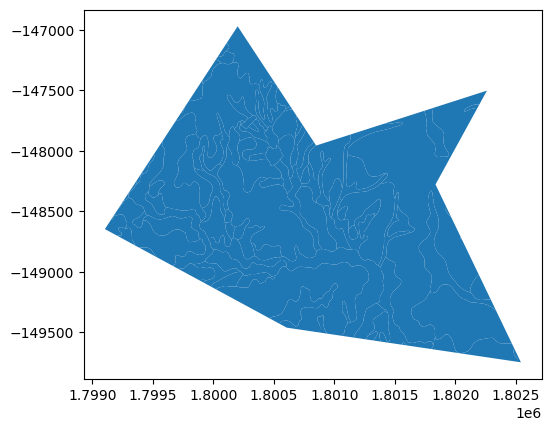

In [24]:
# Display Reprojected AOI
soil_reprojected.plot()
plt.show()

In [25]:
# Save Reprojected AOI
soil_reprojected.to_file(os.path.join(RAWGIS_DIR, "soil_reprojected.shp"))

##  Reproject AOI

We need to reproject the AOI shapefile created in Step 1_A to the same projection as the Daymet data.

In [26]:
# Open AOI
aoi = gpd.read_file(os.path.join(RAWGIS_DIR, 'AOI.shp'))

In [27]:
# Re-project AOI
daymet_crs = pyproj.CRS(daymet_proj)
aoi_reprojected  = aoi.to_crs(daymet_crs)

In [28]:
# Display Reprojected AOI
aoi_reprojected.plot()

<AxesSubplot:>

In [29]:
# Save Reprojected AOI
aoi_reprojected.to_file(os.path.join(RAWGIS_DIR, "AOI_reprojected.shp"))